In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr
import pandas as pd
from scipy import stats

## Load the Argo data from 2005 to 2019

In [2]:
path = '/Users/tongya/Work/Argo_pv/'
dirtmp = path + 'argo_2005-2019_grd.nc'
ds = xr.open_mfdataset(dirtmp, decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (LATITUDE: 180, LEVEL: 27, LONGITUDE: 360, TIME: 174)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * LATITUDE   (LATITUDE) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * LEVEL      (LEVEL) float32 0.0 5.0 10.0 20.0 ... 1400.0 1500.0 1750.0 2000.0
  * TIME       (TIME) float32 0.0 1.0 2.0 3.0 4.0 ... 170.0 171.0 172.0 173.0
Data variables:
    TEMP       (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(174, 27, 180, 360), chunksize=(174, 27, 180, 360)>
    SALT       (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(174, 27, 180, 360), chunksize=(174, 27, 180, 360)>
    PTEMP      (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(174, 27, 180, 360), chunksize=(174, 27, 180, 360)>
    PDEN       (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(174, 27, 180, 360), chunksize=(174, 27, 180, 360)>
    ADDEP      (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask

In [3]:
ds.TIME

<xarray.DataArray 'TIME' (TIME: 174)>
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 1

### index from 0 to 119 is from 2005-01 to 2014-12


In [4]:
ds_new = ds.isel(TIME=slice(0, 120))
ds_new

<xarray.Dataset>
Dimensions:    (LATITUDE: 180, LEVEL: 27, LONGITUDE: 360, TIME: 120)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * LATITUDE   (LATITUDE) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * LEVEL      (LEVEL) float32 0.0 5.0 10.0 20.0 ... 1400.0 1500.0 1750.0 2000.0
  * TIME       (TIME) float32 0.0 1.0 2.0 3.0 4.0 ... 116.0 117.0 118.0 119.0
Data variables:
    TEMP       (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(120, 27, 180, 360), chunksize=(120, 27, 180, 360)>
    SALT       (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(120, 27, 180, 360), chunksize=(120, 27, 180, 360)>
    PTEMP      (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(120, 27, 180, 360), chunksize=(120, 27, 180, 360)>
    PDEN       (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask.array<shape=(120, 27, 180, 360), chunksize=(120, 27, 180, 360)>
    ADDEP      (TIME, LEVEL, LATITUDE, LONGITUDE) float32 dask

## Climatological temperature

/Users/tongya/anaconda3/envs/geo_scipy/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


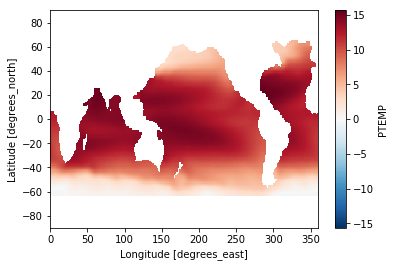

In [5]:
ds_new.PTEMP.mean(dim='LEVEL').mean(dim='TIME').plot()

## Vertical layer

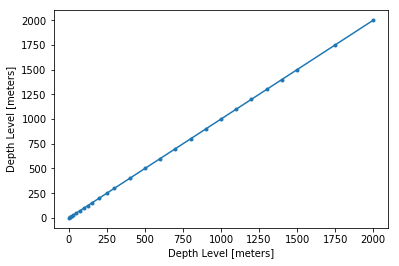

In [6]:
ds_new.LEVEL.plot(marker='.')

## Ocean heat content

### Eq: $ OHC = C_p \rho \int^{0}_{z}Tdz $

### Parameters

In [8]:
cp = 3850 #thermal capacity J/kg/oC
den0 = 1025 # kg/m3
dt = 2592000 # 1 month

In [13]:
ohc = cp * den0 * ds_new.PTEMP.mean(dim='LEVEL') * 2000
ohc_clim_tmp = np.zeros((12, 180, 360))

datatmp = ohc.values
for i in np.arange(12):
    ohc_clim_tmp[i, :, :] = datatmp[i::12, :, :].mean(axis=0)
    
ohc_clim = np.zeros((120, 180, 360))
for i in np.arange(10):
    ohc_clim[i*12:i*12+12, :, :] = ohc_clim_tmp

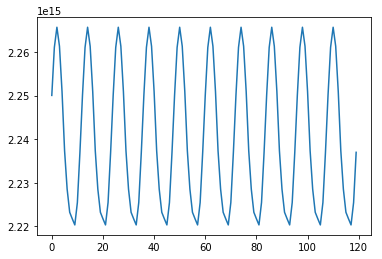

In [15]:
plt.plot(np.nansum(np.nansum(ohc_clim, 1),1))

## OHC anomaly

In [16]:
ohc_anomaly = ohc - ohc_clim
ohc_anomaly

<xarray.DataArray 'PTEMP' (TIME: 120, LATITUDE: 180, LONGITUDE: 360)>
dask.array<shape=(120, 180, 360), dtype=float64, chunksize=(120, 180, 360)>
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * LATITUDE   (LATITUDE) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * TIME       (TIME) float32 0.0 1.0 2.0 3.0 4.0 ... 116.0 117.0 118.0 119.0

## Moving average by 12 months

In [17]:
ohc_ma = ohc_anomaly.rolling(TIME=12).mean()
ohc_ma

<xarray.DataArray '_trim-993f95ea93fe8fffb5f0dab077bb67c2' (TIME: 120, LATITUDE: 180, LONGITUDE: 360)>
dask.array<shape=(120, 180, 360), dtype=float64, chunksize=(120, 180, 360)>
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * LATITUDE   (LATITUDE) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * TIME       (TIME) float32 0.0 1.0 2.0 3.0 4.0 ... 116.0 117.0 118.0 119.0

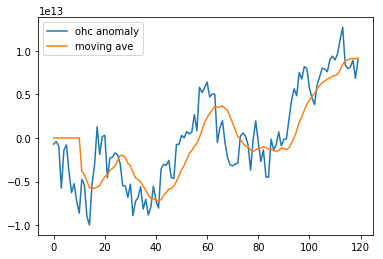

In [18]:
plt.plot(ohc_anomaly.sum(dim='LONGITUDE').sum('LATITUDE'), label='ohc anomaly')
plt.plot(ohc_ma.sum(dim='LONGITUDE').sum('LATITUDE'), label='moving ave')
plt.legend()

In [19]:
def Line_Trend_Model(s):
    '''
    使用最小二乘法确定直线趋势方程
    输入值：s - pd.Series，index为连续型日期的Series
    返回值类型：字典
    返回值：a - 截距，b - 斜率, sigma - 估计标准误差
    '''
    res = {}
    n = len(s)
    m = 2 # 用于计算估计标准误差，线性趋势方程对应的值为 2
    res['t'] = [ i+1 for i in range(n)] #对t进行序号化处理
    avg_t = np.mean(res['t'])
    avg_y = np.mean(s)
    ly = sum( map(lambda x,y:x * y, res['t'], s )) - n * avg_t * avg_y
    lt = sum( map(lambda x:x**2, res['t'])) - n * avg_t ** 2
    res['b'] = ly/lt #斜率
    res['a'] = avg_y - res['b'] * avg_t # 截距
    pre_y = res['a'] + res['b'] * np.array(res['t']) # 直线趋势线
    res['sigma'] = np.sqrt(sum(map(lambda x,y:(x - y)**2, s, pre_y ))/(n-m)) # 估计的标准误差
    return res

## Trend

In [20]:
ohc_trend = np.zeros((180, 360))
datatmp = ohc_ma.values
for j in np.arange(180):
    for i in np.arange(360):
        ohc_trend[j, i] = Line_Trend_Model(datatmp[12:, j ,i])['b']

(-70, 70)

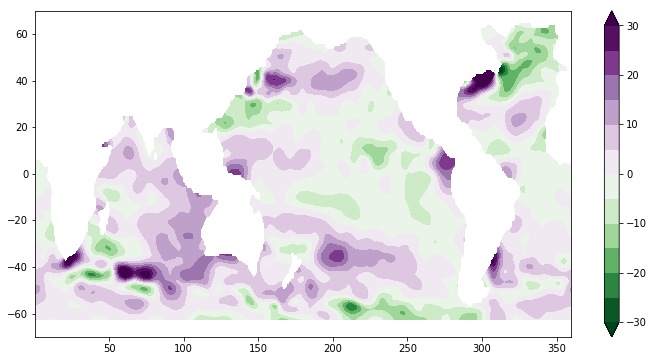

In [22]:
fig = plt.figure(figsize=(12, 6))

plt.contourf(ds.LONGITUDE, ds.LATITUDE, ohc_trend/2592000, np.arange(-30, 31, 5), cmap='PRGn_r', extend='both')
plt.colorbar()
plt.ylim(-70, 70)